<li>Lineer Regresyon</li>
<li>Gradient Descent ile(Batch)</li>
<li>Vectorization</li>

In [1]:
from sklearn.metrics import mean_absolute_error

In [2]:
import numpy as np

In [3]:
def loss_hesapla(thetas,X,Y):
    return np.sum(((X.dot(thetas.T)-Y)**2)/(2*X.shape[0]))

In [4]:
def gradient_descent(thetas,X,Y,lr=0.001):
    thetas -= (2*(X.dot(thetas.T)-Y).T.dot(X)*lr)/X.shape[0]

In [5]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [6]:
veriler = pd.read_csv(r"veriler.csv")

In [7]:
veriler.head()

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e


In [8]:
ss = StandardScaler()

In [9]:
boy = ss.fit_transform(veriler[["boy"]])
boy

array([[-1.62018668],
       [-1.86299395],
       [-1.37737941],
       [-1.47450232],
       [-1.66874813],
       [ 0.807886  ],
       [ 1.29350054],
       [ 0.56507873],
       [ 0.66220164],
       [ 1.05069327],
       [ 0.0794642 ],
       [-0.40615034],
       [-0.16334307],
       [-0.06622016],
       [ 0.1765871 ],
       [ 0.51651728],
       [ 1.4391849 ],
       [ 1.14781618],
       [ 0.95357036],
       [-0.21190452],
       [ 0.03090274],
       [ 0.12802565]])

In [10]:
kilo = ss.fit_transform(veriler[["kilo"]])
kilo

array([[-1.47588873],
       [-1.20033383],
       [-1.29218547],
       [-1.47588873],
       [-1.1084822 ],
       [ 1.27966024],
       [ 0.82040208],
       [ 1.27966024],
       [-0.09811424],
       [ 1.96854749],
       [-0.32774333],
       [-0.55737241],
       [-0.18996588],
       [-0.14404006],
       [-0.00626261],
       [ 0.36114392],
       [ 1.27966024],
       [ 0.82040208],
       [ 1.18780861],
       [-1.01663057],
       [ 0.17744065],
       [-0.28181751]])

In [11]:
girdiler = np.concatenate([boy,kilo],axis=1)
girdiler

array([[-1.62018668, -1.47588873],
       [-1.86299395, -1.20033383],
       [-1.37737941, -1.29218547],
       [-1.47450232, -1.47588873],
       [-1.66874813, -1.1084822 ],
       [ 0.807886  ,  1.27966024],
       [ 1.29350054,  0.82040208],
       [ 0.56507873,  1.27966024],
       [ 0.66220164, -0.09811424],
       [ 1.05069327,  1.96854749],
       [ 0.0794642 , -0.32774333],
       [-0.40615034, -0.55737241],
       [-0.16334307, -0.18996588],
       [-0.06622016, -0.14404006],
       [ 0.1765871 , -0.00626261],
       [ 0.51651728,  0.36114392],
       [ 1.4391849 ,  1.27966024],
       [ 1.14781618,  0.82040208],
       [ 0.95357036,  1.18780861],
       [-0.21190452, -1.01663057],
       [ 0.03090274,  0.17744065],
       [ 0.12802565, -0.28181751]])

In [12]:
ohe = OneHotEncoder()
ulkeler_ohe = ohe.fit_transform(veriler[["ulke"]]).toarray()
ulkeler_ohe

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [13]:
cinsiyet_ohe = ohe.fit_transform(veriler[["cinsiyet"]]).toarray()[:,0]
cinsiyet_ohe = cinsiyet_ohe.reshape(cinsiyet_ohe.shape[0],1)
cinsiyet_ohe

array([[1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [14]:
girdiler = np.concatenate([np.ones((girdiler.shape[0],1)),girdiler,ulkeler_ohe,cinsiyet_ohe],axis=1)
girdiler

array([[ 1.        , -1.62018668, -1.47588873,  0.        ,  1.        ,
         0.        ,  1.        ],
       [ 1.        , -1.86299395, -1.20033383,  0.        ,  1.        ,
         0.        ,  1.        ],
       [ 1.        , -1.37737941, -1.29218547,  0.        ,  1.        ,
         0.        ,  0.        ],
       [ 1.        , -1.47450232, -1.47588873,  0.        ,  1.        ,
         0.        ,  0.        ],
       [ 1.        , -1.66874813, -1.1084822 ,  0.        ,  1.        ,
         0.        ,  1.        ],
       [ 1.        ,  0.807886  ,  1.27966024,  0.        ,  1.        ,
         0.        ,  1.        ],
       [ 1.        ,  1.29350054,  0.82040208,  0.        ,  1.        ,
         0.        ,  1.        ],
       [ 1.        ,  0.56507873,  1.27966024,  0.        ,  1.        ,
         0.        ,  1.        ],
       [ 1.        ,  0.66220164, -0.09811424,  0.        ,  1.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.0506

In [15]:
cikti = veriler["yas"].values
cikti = cikti.reshape((cikti.shape[0],1))
cikti

array([[10],
       [11],
       [10],
       [ 9],
       [12],
       [30],
       [25],
       [35],
       [22],
       [33],
       [27],
       [44],
       [39],
       [41],
       [55],
       [47],
       [23],
       [27],
       [28],
       [29],
       [32],
       [42]], dtype=int64)

In [16]:
thetas = np.ones((1,girdiler.shape[1]))
#thetas = np.random.rand(1,(girdiler.shape[1]))
thetas.shape

(1, 7)

In [17]:
iterasyon = 5000
loss_list = list()

In [18]:
for i in range(iterasyon):
    gradient_descent(thetas,girdiler,cikti,lr=0.001)
    loss_list.append(loss_hesapla(thetas,girdiler,cikti))
    if(i%100 == 0):
        print("{0}.iterasyon, Loss = {1}".format(i,loss_hesapla(thetas,girdiler,cikti)))

0.iterasyon, Loss = 413.2471406111083
100.iterasyon, Loss = 256.0217370902793
200.iterasyon, Loss = 171.8752589789743
300.iterasyon, Loss = 125.38873104637439
400.iterasyon, Loss = 98.56578217480548
500.iterasyon, Loss = 82.2041147545256
600.iterasyon, Loss = 71.5600968424832
700.iterasyon, Loss = 64.16143189964042
800.iterasyon, Loss = 58.69920670453696
900.iterasyon, Loss = 54.464465142019726
1000.iterasyon, Loss = 51.060506288877086
1100.iterasyon, Loss = 48.25529057575663
1200.iterasyon, Loss = 45.90528766715096
1300.iterasyon, Loss = 43.91588287446552
1400.iterasyon, Loss = 42.220565760226705
1500.iterasyon, Loss = 40.769814782230014
1600.iterasyon, Loss = 39.52501940908612
1700.iterasyon, Loss = 38.455043150847544
1800.iterasyon, Loss = 37.53418963082969
1900.iterasyon, Loss = 36.7409289134597
2000.iterasyon, Loss = 36.057047809671154
2100.iterasyon, Loss = 35.46704628569429
2200.iterasyon, Loss = 34.957684325759516
2300.iterasyon, Loss = 34.51762654428847
2400.iterasyon, Loss = 

In [19]:
import matplotlib.pyplot as plt

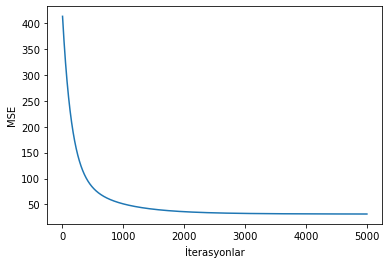

In [20]:
plt.plot(range(1,len(loss_list)+1),loss_list)
plt.xlabel("İterasyonlar")
plt.ylabel("MSE")
plt.show()

In [21]:
indis = 11

In [22]:
print("Gercek = {0}, Tahmin = {1}".format(cikti[indis],girdiler[indis].dot(thetas.T)))

Gercek = [44], Tahmin = [37.47155582]


In [23]:
print("MAE = {}".format(mean_absolute_error(cikti,girdiler.dot(thetas.T))))

MAE = 6.212342203846962


## Normal Equation

In [24]:
thetas_norm_eq = np.linalg.pinv(girdiler.T.dot(girdiler)).dot(girdiler.T).dot(cikti)

In [25]:
print("Gercek = {0}, Tahmin = {1}".format(cikti[indis],girdiler[indis].dot(thetas_norm_eq)))

Gercek = [44], Tahmin = [37.50586643]


In [26]:
print("MAE = {}".format(mean_absolute_error(cikti,girdiler.dot(thetas_norm_eq))))

MAE = 6.068537308508868


## Reguralizasyon ile Lineer Regresyon

In [27]:
reguralizasyon_degeri = 0.001

In [28]:
def loss_hesapla_reg(thetas,X,Y,reg_katsayi=reguralizasyon_degeri):
    temp = thetas.copy()
    temp[0,0] = 0.0
    return (np.sum(((X.dot(thetas.T)-Y)**2))+reg_katsayi*np.sum(temp**2))/(2*X.shape[0])

In [29]:
def gradient_descent_reg(thetas,X,Y,reg_katsayi=reguralizasyon_degeri,lr=reguralizasyon_degeri):
    temp = thetas[0,0:1]*lr*reg_katsayi/X.shape[0]
    thetas = thetas*(1-lr*reg_katsayi/X.shape[0]) - (2*(X.dot(thetas.T)-Y).T.dot(X)*lr)/X.shape[0]
    thetas[0,0:1] += temp
    return thetas

In [30]:
thetas = np.ones((1,girdiler.shape[1]))
#thetas = np.random.rand(1,(girdiler.shape[1]))
thetas.shape

(1, 7)

In [31]:
iterasyon = 5000
loss_list = list()

In [32]:
for i in range(iterasyon):
    thetas = gradient_descent_reg(thetas,girdiler,cikti,lr=0.001)
    loss_list.append(loss_hesapla_reg(thetas,girdiler,cikti))
    if(i%100 == 0):
        print("{0}.iterasyon, Loss = {1}".format(i,loss_hesapla_reg(thetas,girdiler,cikti)))

0.iterasyon, Loss = 413.24728310716085
100.iterasyon, Loss = 256.02268635292546
200.iterasyon, Loss = 171.87706594200702
300.iterasyon, Loss = 125.39125582365267
400.iterasyon, Loss = 98.56887235064177
500.iterasyon, Loss = 82.20765301555728
600.iterasyon, Loss = 71.56400397587937
700.iterasyon, Loss = 64.16565770878242
800.iterasyon, Loss = 58.70372005846784
900.iterasyon, Loss = 54.469246259221364
1000.iterasyon, Loss = 51.06554153219226
1100.iterasyon, Loss = 48.26056923542601
1200.iterasyon, Loss = 45.91080012030313
1300.iterasyon, Loss = 43.921619627280386
1400.iterasyon, Loss = 42.22651702432541
1500.iterasyon, Loss = 40.77597035637404
1600.iterasyon, Loss = 39.531368722804245
1700.iterasyon, Loss = 38.46157538366364
1800.iterasyon, Loss = 37.5408938572092
1900.iterasyon, Loss = 36.747794246156054
2000.iterasyon, Loss = 36.06406352775199
2100.iterasyon, Loss = 35.47420194148815
2200.iterasyon, Loss = 34.964969829457615
2300.iterasyon, Loss = 34.525032227331856
2400.iterasyon, Los

In [33]:
print("MAE = {}".format(mean_absolute_error(cikti,girdiler.dot(thetas.T))))

MAE = 6.212453325145737


## Reguralizasyon ile Normal Equation

In [34]:
reguralizasyon_degeri = 0.001
indis = 6

In [35]:
reg_matrix = np.eye(girdiler.shape[1])
reg_matrix[0,0] = 0.
reg_matrix

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

In [36]:
thetas_norm_eq = np.linalg.pinv(girdiler.T.dot(girdiler)+reg_matrix*reguralizasyon_degeri).dot(girdiler.T).dot(cikti)

In [37]:
print("Gercek = {0}, Tahmin = {1}".format(cikti[indis],girdiler[indis].dot(thetas_norm_eq)))

Gercek = [25], Tahmin = [23.99283693]


In [38]:
print("MAE = {}".format(mean_absolute_error(cikti,girdiler.dot(thetas_norm_eq))))

MAE = 6.068515365067475


# Tek değişkenli Lineer Regresyon Surface ve Contour Grafikleri Çizdirme

In [39]:
X = ss.fit_transform(veriler[["boy"]])

In [40]:
X = np.concatenate([np.ones((X.shape[0],1)),X],axis=1)
X 

array([[ 1.        , -1.62018668],
       [ 1.        , -1.86299395],
       [ 1.        , -1.37737941],
       [ 1.        , -1.47450232],
       [ 1.        , -1.66874813],
       [ 1.        ,  0.807886  ],
       [ 1.        ,  1.29350054],
       [ 1.        ,  0.56507873],
       [ 1.        ,  0.66220164],
       [ 1.        ,  1.05069327],
       [ 1.        ,  0.0794642 ],
       [ 1.        , -0.40615034],
       [ 1.        , -0.16334307],
       [ 1.        , -0.06622016],
       [ 1.        ,  0.1765871 ],
       [ 1.        ,  0.51651728],
       [ 1.        ,  1.4391849 ],
       [ 1.        ,  1.14781618],
       [ 1.        ,  0.95357036],
       [ 1.        , -0.21190452],
       [ 1.        ,  0.03090274],
       [ 1.        ,  0.12802565]])

In [41]:
#thetas = np.ones((1,X.shape[1]))
#thetas = np.array([[60,20]])
thetas = np.random.rand(1,(X.shape[1]))
thetas.shape

(1, 2)

In [42]:
iterasyon = 10000
loss_list = list()
thetas_list = list()

In [43]:
for i in range(iterasyon):
    thetas = gradient_descent_reg(thetas,X,cikti,lr=0.001)
    if(i%100 == 0 or i==iterasyon-1):
        print("{0}.iterasyon, Loss = {1}".format(i,loss_hesapla_reg(thetas,X,cikti)))
        loss_list.append(loss_hesapla_reg(thetas,X,cikti))
        thetas_list.append(thetas[0])

0.iterasyon, Loss = 467.6789066724361
100.iterasyon, Loss = 333.0607777725805
200.iterasyon, Loss = 242.85973522553311
300.iterasyon, Loss = 182.42041914170656
400.iterasyon, Loss = 141.92298598763185
500.iterasyon, Loss = 114.78763655023268
600.iterasyon, Loss = 96.60556770703043
700.iterasyon, Loss = 84.42265519433289
800.iterasyon, Loss = 76.25948426699503
900.iterasyon, Loss = 70.78974558830424
1000.iterasyon, Loss = 67.12474395990813
1100.iterasyon, Loss = 64.66900810566501
1200.iterasyon, Loss = 63.02354181385392
1300.iterasyon, Loss = 61.920997236432726
1400.iterasyon, Loss = 61.182237672911604
1500.iterasyon, Loss = 60.68723240723775
1600.iterasyon, Loss = 60.35555475600216
1700.iterasyon, Loss = 60.13331476115346
1800.iterasyon, Loss = 59.98440342472898
1900.iterasyon, Loss = 59.884625897916585
2000.iterasyon, Loss = 59.81777041766209
2100.iterasyon, Loss = 59.77297429334977
2200.iterasyon, Loss = 59.742958983474026
2300.iterasyon, Loss = 59.722847507093114
2400.iterasyon, Los

In [44]:
theta_0 = np.array([x[0] for x in thetas_list])
theta_1 = np.array([x[1] for x in thetas_list])
J_history = np.array(loss_list)

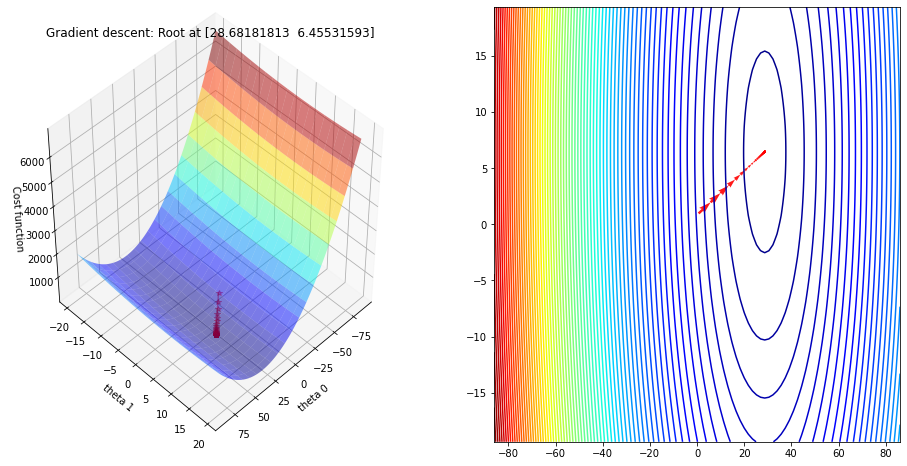

In [45]:
T0, T1 = np.meshgrid(np.linspace(thetas[0,0]*-3,thetas[0,0]*3,100),
                     np.linspace(thetas[0,1]*-3,thetas[0,1]*3,100))
z_temp = np.array([loss_hesapla(np.array([[t0,t1]]),X,cikti) for t0, t1 in zip(np.ravel(T0), np.ravel(T1))])
Z = z_temp.reshape(T0.shape)

anglesx = np.array(theta_0)[1:] - np.array(theta_0)[:-1]
anglesy = np.array(theta_1)[1:] - np.array(theta_1)[:-1]

%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(T0, T1, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
ax.plot(theta_0,theta_1,J_history, marker = '*', color = 'r', alpha = .4, label = 'Gradient descent')

ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost function')
ax.set_title('Gradient descent: Root at {}'.format(thetas.ravel()))
ax.view_init(45, 45)

ax = fig.add_subplot(1, 2, 2)
ax.contour(T0, T1, Z, 70, cmap = 'jet')
ax.quiver(theta_0[:-1], theta_1[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)

plt.show()